In [2]:
# zsl_labeled_corpus.csv
import pandas as pd
import numpy as np

In [4]:
path = 'drive/My Drive/NLP_research_notes/NLP_research/'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path + 'zsl_labeled_ML_categories_corpus.csv', header=0, error_bad_lines=False)

In [ ]:
df.shape

(1633, 3)

In [ ]:
df.head()

,Title,Label,Confidence Score
0,Invariant web defect detection and classificat...,'Machine learning applications',0.510056
1,Actions in context,'Machine learning applications',0.498855
2,An image-based Bayesian framework for face det...,'Machine learning applications',0.614692
3,Fast sparse representation with prototypes,'Optimization',0.806253
4,Semi-supervised hashing for scalable image ret...,'Optimization',0.426754


In [ ]:
# dup_indexes = [num-1 for num in dup_indexes_plus]

In [ ]:
# dup_indexes.txt
# df_dup_indexes = pd.read_csv('dup_indexes.txt', sep=", ", header=None)

/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
# dup_id_lst = dup_indexes.values.tolist()

In [ ]:
df_ngrams_origin = pd.read_csv(path + 'titles_ngrams.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_ngrams = pd.read_csv(path + "finalized_bitrigrams.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_ngrams.shape

(52302, 125)

In [ ]:
df_ngrams_origin.shape

(52302, 107)

In [ ]:
df_ngrams.insert(0, "Title", df_ngrams_origin['Title'])

In [ ]:
df_ngrams.head()

,Title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
0,Surveylance: Automatically Detecting Online Su...,surveylance,popular_mechanism,systematic_analysis,monetary_compensation,fraudulent_survey,websites,online_surveys,assisting_human_analysts,executing_social_engineering,attacks,wide_range,similarly_rising,identifying_unique_websites,survey_scam_ecosystem,analysis_reveals,identity_fraud,deceptive_advertisements,unwanted_programs,pups_malicious_extensions,free_content,easily_reachable,survey_scams,access_codes,services__mapping,commercial_software,survey_scams,secondary_revenue_stream,unsuspecting_users,sizable_population,promised_content,survey_scam_detection,surveylance_works,large_number,expose_users,parties_involved,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EyeTell: Video-Assisted Touchscreen Keystroke ...,eyetell,victim_device,continuous_movements,victims_keystrokes,touchscreen_device,inferring_pins,lock_patterns,high_efficacy,increasing_threat,typing_sequence,human_eyes_naturally,focus,visually_observe,video_capturing,victims_inputting_process,unique_gaze_trace,novel_video_assisted,attack,eyetell_requires,movements__eyetell,explores,english_words,android_devices_confirm,keystroke_inference_attacks,pose,static_holder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Understanding Linux Malware,Understanding_Linux_Malware,work,linux_malware,comprehensive_study_attempting,implementation_details,different_architectures,fighting_malicious_programs,time_frame,mirai_botnet,personal_computers_predominantly,profoundly_different,malware_analysis_pipeline,specifically_tailored,linux_operating_system,pushing_malicious_actors,analyzing_linux_malware,large_scale_measurement,study_conducted,challenges_involved,systematic_exploration,systematic_studies_focused,sparse_reports,security_community,blog_posts,year__documenting,detailed_statistics,embedded_devices,main_challenges,windows_based_operating,malware_landscape,embedded_devices,aspect_causes,rapidly_changing,x_flavored_architectures,embedded_systems_rely,g,specific_families,large_number,malware_samples,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SoK: Keylogging Side Channels,sok,research,press__enabled,channels_emanating,spike__emitted,host_computer,plaintext_communications,channel_attacks,channel_reveals_physical,locations,temporal_keylogging,electromagnetic_spike_emanating,typing_speed,different_temporal_features,strongly_correlates,release_timings,typing_english_words,nontrivial_information_gains,users_finger,hand_movements,countless_keyboard_electromagnetic,channel_attack,idealized_spatial,channel_leverages_press,channel_leaks,attacks,field_conditions,information_gained,acoustic_emanations,microarchitectural_attacks,mitigation_techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"FuturesMEX: Secure, Distributed Futures Market...",futuresmex,physical_layer,chicago_mercantile_exchange,traders_previously_valid,positions,exchanges_economic_viability,availability,abort_absence,actual_trading_days,thomson_reuters,tick_history,sell_contractual_promises,futures,price_discrimination,risk_management,positions__absence,concept_implementation,valid_traders_valid,action,traders_anonymity,distributed__asynchrono

In [ ]:
df_ngrams.shape

(52302, 126)

In [ ]:
# df_title_labels = pd.read_csv(path + '\zsl_labeled_domains_corpus.csv')

In [ ]:
df_ngrams_selected = df_ngrams[df_ngrams['Title'].isin(df['Title'])]

In [ ]:
# to_drop = df_ngrams.index[dup_indexes]
# df_ngrams.drop(to_drop, inplace = True)

In [ ]:
df_ngrams_selected.shape

(1643, 126)

In [ ]:
df.shape

(1633, 3)

In [ ]:
df_ngrams_selected.drop_duplicates(subset='Title', keep='first', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ngrams_selected.shape

(1633, 126)

In [ ]:
df.shape

(1633, 3)

In [ ]:
abstract = df_ngrams_selected.loc[ : , df_ngrams.columns!= "Title"].values.tolist()

In [ ]:
# remove NaN
clean_abstract = []
for doc in abstract:
    clean_doc = []
    for phrase in doc:
        if pd.isnull(phrase) or str(phrase).isdigit():
            continue
        clean_doc.append(phrase)
    clean_abstract.append(clean_doc)

In [ ]:
print(len(clean_abstract))

1633


In [ ]:
clean_abstract_string = [" ".join(lst) for lst in clean_abstract]

In [ ]:
print(len(clean_abstract_string))

1633


In [ ]:
# create abstract ml categories label dataset 
ml_cate_data = {'abstract': clean_abstract_string, 'labels': df['Label']}
df_ml_abs_labeled = pd.DataFrame(ml_cate_data)
df_ml_abs_labeled.head()

,abstract,labels
0,data_traces_obtained invariant_physical_proper...,'Machine learning applications'
1,angora increase_branch_coverage symbolic_execu...,'Machine learning applications'
2,long_term_temporal relationships fully_automat...,'Machine learning applications'
3,constructing_valid_behavior specifications lea...,'Optimization'
4,data_model scheme_mapping expressive_power int...,'Optimization'


In [ ]:
df_ml_abs_labeled.to_csv(path +"ml_abstract_labels.csv" )

### Load in dataset

In [6]:
df_whole = pd.read_csv(path + "ml_abstract_labels.csv")

### Train Test Split

In [7]:
df_whole.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df_whole.head()

,abstract,labels
0,data_traces_obtained invariant_physical_proper...,'Machine learning applications'
1,angora increase_branch_coverage symbolic_execu...,'Machine learning applications'
2,long_term_temporal relationships fully_automat...,'Machine learning applications'
3,constructing_valid_behavior specifications lea...,'Optimization'
4,data_model scheme_mapping expressive_power int...,'Optimization'


In [ ]:
# df_whole.to_csv(path + "abstract_domains_labels.csv")

In [9]:
# concatenate words in labels
def concatenate_phrase(lst):
    new_lst = []
    for phrase in lst:
        new_p = "_".join(phrase.split(" "))
        new_lst.append(new_p)
    return new_lst
tmp_lst = concatenate_phrase(df_whole['labels'].tolist())
df_whole['labels'] = pd.Series(tmp_lst)

In [10]:
df_whole.groupby('labels').abstract.count()

labels
'Deep_learning'                     30
'General_machine_learning'          33
'Learning_theory'                   30
'Machine_learning_applications'    847
'Optimization'                     617
'Probabilistic_inference'           53
'Trustworthy_machine_learning'      23
Name: abstract, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
import nltk
import gensim
import logging
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
train, test = train_test_split(df_whole, test_size=0.20)

In [13]:
train.head()

,abstract,labels
1184,extract_gripping_information individual_object...,'Machine_learning_applications'
145,complementary_modalities prior_works single_ca...,'Machine_learning_applications'
770,approach_makes conditional_probability_density...,'Optimization'
72,guide_future_efforts network_based_architectur...,'Optimization'
1617,partitions input_assignments identify_infeasib...,'Machine_learning_applications'


In [14]:
X_train = train['abstract']
y_train = train['labels']

X_test = test['abstract']
y_test = test['labels']

In [15]:
# create bow embedding
from sklearn.feature_extraction.text import CountVectorizer
def vectorize_text(X_train, X_test, vectorizer):
    X_train_matrix = vectorizer.fit_transform(X_train)
    X_test_matrix = vectorizer.transform(X_test)
    return X_train_matrix, X_test_matrix
bow_vectorizer = CountVectorizer(stop_words = 'english')

In [16]:
X_train_bow, X_test_bow = vectorize_text(X_train, X_test, bow_vectorizer)

In [17]:
X = bow_vectorizer.fit_transform(df_whole['abstract'])

In [18]:
# label encode segments
# label encoding train_labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(df_whole['labels'])

In [19]:
tags = list(le.classes_)

### Resampling

In [20]:
# summarize class distribution
from collections import Counter
def summarize_class_distributions(Y):
    counter= Counter(Y)
    print(counter)
    return counter

In [21]:
import matplotlib.pyplot as plt
def plot_resample_segments(dictionary):
    plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
    plt.show()

Counter({"'Machine_learning_applications'": 847, "'Optimization'": 617, "'Probabilistic_inference'": 53, "'General_machine_learning'": 33, "'Learning_theory'": 30, "'Deep_learning'": 30, "'Trustworthy_machine_learning'": 23})


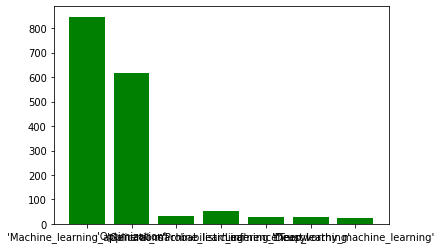

In [21]:
# summarize class distirbution before undersampling
# summarize the new class distribution
no_resample_dict = summarize_class_distributions(df_whole['labels'])
plot_resample_segments(no_resample_dict)

In [ ]:
import six

In [ ]:
# pip install sklearn

In [ ]:
# import sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [22]:
pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 12.3 MB/s 
     |████████████████████████████████| 22.3 MB 80.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

In [22]:
# randomoversample + random undersample to resample dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 

In [23]:
from imblearn.over_sampling import RandomOverSampler 

In [24]:
def over_under_resample(X, Y, st1 = 'auto', st2 = 'majority'):
    over = RandomOverSampler(sampling_strategy= st1, random_state=42) # oversample the minority class to have ... percent the number of examples of the majority class
    under = RandomUnderSampler(sampling_strategy= st2, random_state=42) # reduce the number of examples in majority class to have ... percent more than the minority class
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps = steps)
    X_res, Y_res = pipeline.fit_resample(X, Y)
    return X_res, Y_res

In [25]:
X_ou, Y_ou = over_under_resample(X, Y)

In [ ]:
# smote
# from imblearn.over_sampling import SMOTE
# smt = SMOTE(random_state=0, sampling_strategy= 'minority')
# X_smt, Y_smt = smt.fit_resample(X, Y)

Counter({0: 847, 1: 847, 2: 847, 3: 847, 4: 847, 5: 847, 6: 847})


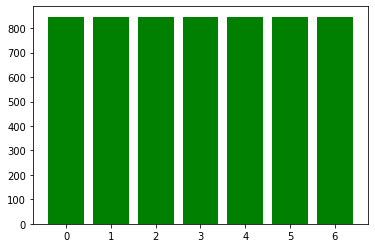

In [ ]:
Random_over_under_dict = summarize_class_distributions(Y_ou)
plot_resample_segments(Random_over_under_dict)

In [26]:
X_train_ou, X_test_ou, y_train_ou, y_test_ou = train_test_split(X_ou,Y_ou,test_size=0.20,random_state=42, shuffle=True)

Gather ROC metrics elements

In [ ]:
# get precision, recall, and auc score
def get_roc_curves_number(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # get roc curves required values
    TPR = TP/(TP+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    return TPR, FPR

### Text Classification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# base line model logistic regression 
# test a sample logistic regression
# logreg = LogisticRegression(C=10)
# logreg = logreg.fit(X_train_ou, train['labels'])
# pred_lg = logreg.predict(X_test_ou)
# print('accuracy %s' % accuracy_score(pred_lg, test.labels))
# print(classification_report(test.labels, pred_lg))

In [ ]:
def print_grid_search_metrics(clf, parameters, X_train, X_test, y_train, y_test):
    gs = GridSearchCV(clf, parameters, scoring='f1_micro')
    gs.fit(X_train, y_train)
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
    best_model = gs.best_estimator_
    print(classification_report(y_test, best_model.predict(X_test), digits=4))
    return best_model

In [ ]:
lg_parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10), 
}
lr = LogisticRegression()

In [ ]:
lg_parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10), 
}
# Grid_LR = GridSearchCV(LogisticRegression(),lg_parameters, cv=3, scoring= 'f1-micro')
# Grid_LR.fit(X_train_word_average, train['labels'])
# print_grid_search_metrics(Grid_LR)
best_LR_model = print_grid_search_metrics(lr, lg_parameters, X_train_ou, X_test_ou, y_train_ou, y_test_ou)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

Best score: 0.889945445572288
Best parameters set:
C:5
penalty:l2
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       189
           1     1.0000    1.0000    1.0000       177
           2     1.0000    1.0000    1.0000       148
           3     0.6457    0.6848    0.6647       165
           4     0.6259    0.5839    0.6042       149
           5     1.0000    1.0000    1.0000       179
           6     1.0000    1.0000    1.0000       179

    accuracy                         0.9039      1186
   macro avg     0.8959    0.8955    0.8956      1186
weighted avg     0.9037    0.9039    0.9036      1186



In [ ]:
y_pred_lg = best_LR_model.predict(X_test_ou)
print('accuracy %s' % accuracy_score(y_pred_lg, y_test_ou))
print(classification_report(y_test_ou, y_pred_lg))

accuracy 0.9038785834738617
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       148
           3       0.65      0.68      0.66       165
           4       0.63      0.58      0.60       149
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       179

    accuracy                           0.90      1186
   macro avg       0.90      0.90      0.90      1186
weighted avg       0.90      0.90      0.90      1186



In [ ]:
# compare results without resampling 
best_LR_model_origin = print_grid_search_metrics(lr, lg_parameters, X_train_bow, X_test_bow, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

Best score: 0.5275657336726038
Best parameters set:
C:0.01
penalty:l2
                                 precision    recall  f1-score   support

                'Deep_learning'     0.0000    0.0000    0.0000         7
     'General_machine_learning'     0.0000    0.0000    0.0000         7
              'Learning_theory'     0.0000    0.0000    0.0000         2
'Machine_learning_applications'     0.4832    1.0000    0.6515       158
                 'Optimization'     0.0000    0.0000    0.0000       138
      'Probabilistic_inference'     0.0000    0.0000    0.0000        10
 'Trustworthy_machine_learning'     0.0000    0.0000    0.0000         5

                       accuracy                         0.4832       327
                      macro avg     0.0690    0.1429    0.0931       327
                   weighted avg     0.2335    0.4832    0.3148       327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
svc_param_grid = {'C':[0.01, 0.1, 1, 10]}
  
# Grid_SVM = GridSearchCV(LinearSVC(), svc_param_grid, refit = True, verbose = 3, cv =3) 

# fitting the model for grid search 
# Grid_SVM.fit(X_train_word_average, train['labels'])
# print_grid_search_metrics(Grid_SVM)
# best_SVM = Grid_SVM.best_estimator_
svc = LinearSVC()

In [ ]:
best_SVC_model = print_grid_search_metrics(svc, svc_param_grid, X_train_ou, X_test_ou, y_train_ou, y_test_ou)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best score: 0.8893132011044272
Best parameters set:
C:0.01
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       189
           1     1.0000    1.0000    1.0000       177
           2     1.0000    1.0000    1.0000       148
           3     0.6386    0.6424    0.6405       165
           4     0.6014    0.5973    0.5993       149
           5     1.0000    1.0000    1.0000       179
           6     1.0000    1.0000    1.0000       179

    accuracy                         0.8997      1186
   macro avg     0.8914    0.8914    0.8914      1186
weighted avg     0.8996    0.8997    0.8996      1186



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
y_pred_svc = best_SVC_model.predict(X_test_ou)
print('accuracy %s' % accuracy_score(y_pred_svc, y_test_ou))
print(classification_report(y_test_ou, y_pred_svc))

accuracy 0.8996627318718381
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       148
           3       0.64      0.64      0.64       165
           4       0.60      0.60      0.60       149
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       179

    accuracy                           0.90      1186
   macro avg       0.89      0.89      0.89      1186
weighted avg       0.90      0.90      0.90      1186



In [ ]:
# compare with results before resampling 
best_SVC_model_origin = print_grid_search_metrics(svc, svc_param_grid, X_train_bow, X_test_bow, y_train, y_test)

Best score: 0.5283320171975081
Best parameters set:
C:0.01
                                 precision    recall  f1-score   support

                'Deep_learning'     0.0000    0.0000    0.0000         7
     'General_machine_learning'     0.0000    0.0000    0.0000         7
              'Learning_theory'     0.0000    0.0000    0.0000         2
'Machine_learning_applications'     0.4840    0.9557    0.6426       158
                 'Optimization'     0.3333    0.0362    0.0654       138
      'Probabilistic_inference'     0.0000    0.0000    0.0000        10
 'Trustworthy_machine_learning'     0.0000    0.0000    0.0000         5

                       accuracy                         0.4771       327
                      macro avg     0.1168    0.1417    0.1011       327
                   weighted avg     0.3745    0.4771    0.3381       327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [ ]:
# gb_param_grid = {'n_estimators': [100, 200, 400, 800]}  
  
# Grid_GB = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, refit = True, verbose = 3, cv =3) 

# fitting the model for grid search 
# Grid_GB.fit(X_train_word_average, train['labels'])
# print_grid_search_metrics(Grid_GB)
# best_GB = Grid_GB.best_estimator_

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train_ou, y_train_ou)
pred_GB = GB.predict(X_test_ou)
print(metrics.classification_report(y_test_ou, pred_GB, zero_division= 1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       189
           1       0.97      1.00      0.99       177
           2       0.95      1.00      0.97       148
           3       0.60      0.75      0.67       165
           4       0.63      0.36      0.45       149
           5       0.96      1.00      0.98       179
           6       0.99      1.00      1.00       179

    accuracy                           0.88      1186
   macro avg       0.87      0.87      0.86      1186
weighted avg       0.88      0.88      0.88      1186



In [ ]:
# before resampling 
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train_bow, y_train)
pred_GB = GB.predict(X_test_bow)
print(metrics.classification_report(y_test, pred_GB, zero_division= 1))

                                 precision    recall  f1-score   support

                'Deep_learning'       1.00      0.00      0.00         7
     'General_machine_learning'       0.00      0.00      0.00         7
              'Learning_theory'       1.00      0.00      0.00         2
'Machine_learning_applications'       0.47      0.87      0.61       158
                 'Optimization'       0.33      0.09      0.14       138
      'Probabilistic_inference'       1.00      0.00      0.00        10
 'Trustworthy_machine_learning'       1.00      0.00      0.00         5

                       accuracy                           0.46       327
                      macro avg       0.69      0.14      0.11       327
                   weighted avg       0.44      0.46      0.35       327



### LSTM

In [ ]:
import keras
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.layers import Bidirectional
import random
import matplotlib.pyplot as plt



In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
from gensim.models import Word2Vec
wv_model = Word2Vec.load(path + "word2vec_domains.model")

In [ ]:
# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
w2v_weights = wv_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

In [ ]:
def word2token(word):
    try:
        return wv_model.wv.vocab[word].index
    # If word is not in index return 0. I realize this means that this
    # is the same as the word of index 0 (i.e. most frequent word), but 0s
    # will be padded later anyway by the embedding layer (which also
    # seems dirty but I couldn't find a better solution right now)
    except KeyError:
        return 0
def token2word(token):
    return wv_model.wv.index2word[token]

In [ ]:
import string
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# From the previous observations that labels are not distributed evenly
# create  an iterator that formats data from data from the dataset proper for LSTM training 
# Sequences will be padded or truncated to this length
MAX_SEQUENCE_LENGTH1 = 100

# Samples of categories with less than this number of samples will be ignored
# based on the previous observation
DROP_THRESHOLD1 = 100

In [ ]:
# MAX_SEQUENCE_LENGTH2 = 200

# Samples of categories with less than this number of samples will be ignored
# based on the previous observation
# DROP_THRESHOLD2 = 1000

In [ ]:
class SequenceIterator:
    def __init__(self, dataset, drop_threshold, seq_length):
        self.dataset = dataset

        self.translator = str.maketrans('', '', string.punctuation + '–')
        self.categories, self.ccount = np.unique(dataset.labels, return_counts=True)
        
        self.seq_length = seq_length
        
        # Samples of categories with less than this number of samples will be ignored
        self.drop_categos = []
        for cat, count in zip(self.categories, self.ccount):
            if count < drop_threshold:
                self.drop_categos.append(cat)
        
        # Remaining categories
        self.categories = np.setdiff1d(self.categories, self.drop_categos)
        
    def __iter__(self):
        for news, cat in zip(self.dataset.iloc[:, 0], self.dataset.iloc[:, 1]):
            if cat in self.drop_categos:
                continue
            
            # Make all characters lower-case
            news = news.lower()
            
            # Clean string of all punctuation
            news = news.translate(self.translator)

            words = np.array([word2token(w) for w in news.split(' ')[:self.seq_length] if w != ''])
                                
            yield (words, cat)

In [ ]:
# try different drop_threshold, max_sequence_length
def train_lstm(df_whole, DROP_THRESHOLD, MAX_SEQUENCE_LENGTH):
    sequences = SequenceIterator(df_whole, DROP_THRESHOLD, MAX_SEQUENCE_LENGTH)

    # Used for generating the labels in the set
    cat_dict = {k: v for k, v in zip(sequences.categories, range(len(sequences.categories)))}

    set_x = []
    set_y = []
    for w, c in sequences:
        set_x.append(w)
        set_y.append(cat_dict[c])

    # Padding sequences with 0.
    set_x = pad_sequences(set_x, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
    set_y = np.array(set_y)

    print(set_x.shape)
    print(set_y.shape)

    # train and validation dataset splitting
    VALID_PER = VALID_PER = 0.19 # Percentage of the whole set that will be separated for validation
     # Percentage of the whole set that will be separated for validation

    total_samples = set_x.shape[0]
    n_val = int(VALID_PER * total_samples)
    n_train = total_samples - n_val

    random_i = random.sample(range(total_samples), total_samples)
    train_x = set_x[random_i[:n_train]]
    train_y = set_y[random_i[:n_train]]
    val_x = set_x[random_i[n_train:n_train+n_val]]
    val_y = set_y[random_i[n_train:n_train+n_val]]

    print("Train Shapes - X: {} - Y: {}".format(train_x.shape, train_y.shape))
    print("Val Shapes - X: {} - Y: {}".format(val_x.shape, val_y.shape))

    # Let's look at the distribution of categories in both sets
    categories, ccount = np.unique(train_y, return_counts=True)
    plt.figure(figsize=(16, 8))
    plt.title("Training Set - Category Distribution")
    plt.xticks(range(len(categories)), cat_dict.keys())
    plt.bar(categories, ccount, align='center')
    plt.show()

    categories, ccount = np.unique(val_y, return_counts=True)
    plt.figure(figsize=(16, 8))
    plt.title("Validation Set - Category Distribution")
    plt.xticks(range(len(categories)), cat_dict.keys())
    plt.bar(categories, ccount, align='center')
    plt.show()

    n_categories = len(categories)

    #train LSTM model
    lstm = Sequential()

    # Keras Embedding layer with Word2Vec weights initialization
    lstm.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_size,
                        weights=[w2v_weights],
                        input_length=MAX_SEQUENCE_LENGTH,
                        mask_zero=True,
                        trainable=False))

    lstm.add(Bidirectional(LSTM(100)))
    lstm.add(Dense(n_categories, activation='softmax'))

    lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

    history_lstm = lstm.fit(train_x, train_y, epochs=5, batch_size=64,
                        validation_data=(val_x, val_y), verbose=1)
    #get precison, recall, f1-score
    ypred_lstm = lstm.predict(val_x, verbose=1)
    #predict classes
    ypred_classes_lstm = lstm.predict_classes(val_x, verbose=1)
    return val_y, ypred_classes_lstm

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

(1464, 100)
(1464,)
Train Shapes - X: (1186, 100) - Y: (1186,)
Val Shapes - X: (278, 100) - Y: (278,)


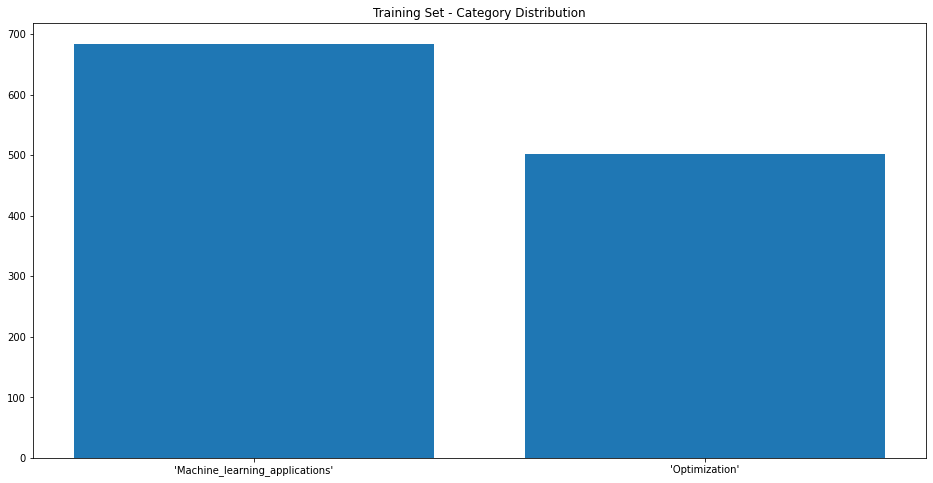

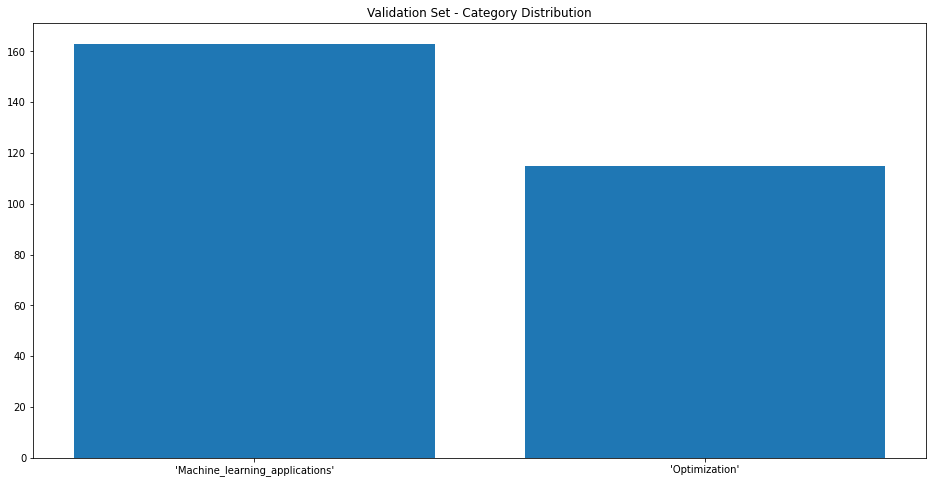

Epoch 1/5
19/19 [==============================] - 38s 540ms/step - loss: 0.7102 - acc: 0.5527 - f1_m: 0.5988 - precision_m: 0.4306 - recall_m: 0.9938 - val_loss: 0.6843 - val_acc: 0.5791 - val_f1_m: 0.5824 - val_precision_m: 0.4131 - val_recall_m: 1.0000
Epoch 2/5
19/19 [==============================] - 8s 426ms/step - loss: 0.6542 - acc: 0.6209 - f1_m: 0.5978 - precision_m: 0.4286 - recall_m: 1.0000 - val_loss: 0.6952 - val_acc: 0.5504 - val_f1_m: 0.5824 - val_precision_m: 0.4131 - val_recall_m: 1.0000
Epoch 3/5
19/19 [==============================] - 8s 427ms/step - loss: 0.6344 - acc: 0.6413 - f1_m: 0.5981 - precision_m: 0.4289 - recall_m: 1.0000 - val_loss: 0.7057 - val_acc: 0.5360 - val_f1_m: 0.5824 - val_precision_m: 0.4131 - val_recall_m: 1.0000
Epoch 4/5
19/19 [==============================] - 8s 431ms/step - loss: 0.6117 - acc: 0.6704 - f1_m: 0.5968 - precision_m: 0.4269 - recall_m: 1.0000 - val_loss: 0.7190 - val_acc: 0.5396 - val_f1_m: 0.5824 - val_precision_m: 0.4131 - 

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9/9 [==============================] - 1s 65ms/step


In [ ]:
val_y1, ypred_classes_lstm1 = train_lstm(df_whole, DROP_THRESHOLD1, MAX_SEQUENCE_LENGTH1)

In [ ]:
def evaluate_lstm(val_y,ypred_classes_lstm):
    precision_lstm = precision_score(val_y,ypred_classes_lstm, average='weighted' )
    print('Precision: %f' % precision_lstm)
    # recall: tp / (tp + fn)
    recall_lstm = recall_score(val_y, ypred_classes_lstm, average='weighted')
    print('Recall: %f' % recall_lstm)
    # f1: 2 tp / (2 tp + fp + fn)
    f1_lstm = f1_score(val_y, ypred_classes_lstm, average='weighted')
    print('F1 score: %f' % f1_lstm)

In [ ]:
evaluate_lstm(val_y1,ypred_classes_lstm1)

Precision: 0.483011
Recall: 0.535971
F1 score: 0.480158


### BOW

In [ ]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
max_words = 1000
num_classes = np.max(Y) + 1

In [ ]:
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train['abstract']) # only fit on train

In [ ]:
X_tokenized = tokenize.texts_to_matrix(df_whole['abstract'])
Y_categorical = to_categorical(Y, num_classes)

In [ ]:
X_ou_bow, Y_ou_bow = over_under_resample(X_tokenized, Y_categorical)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4 5 6] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4 5 6] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
X_train_ou_bow, X_test_ou_bow, y_train_ou_bow, y_test_ou_bow = train_test_split(X_ou_bow,Y_ou_bow,test_size=0.20,random_state=42, shuffle=True)

In [ ]:
# train test split before resampling 
X_train_tok, X_test_tok, y_train_cate, y_test_cate = train_test_split(X_tokenized,Y_categorical,test_size=0.20,random_state=42, shuffle=True)

In [ ]:
batch_size = 32
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
history = model.fit(X_train_ou_bow, y_train_ou_bow,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/10
104/104 [==============================] - 2s 9ms/step - loss: 0.4144 - acc: 0.4654 - f1_m: 0.1821 - precision_m: 0.4454 - recall_m: 0.1301 - val_loss: 0.1602 - val_acc: 0.8187 - val_f1_m: 0.8017 - val_precision_m: 0.9708 - val_recall_m: 0.6856
Epoch 2/10
104/104 [==============================] - 1s 5ms/step - loss: 0.1231 - acc: 0.9036 - f1_m: 0.8803 - precision_m: 0.9679 - recall_m: 0.8093 - val_loss: 0.0985 - val_acc: 0.8412 - val_f1_m: 0.8403 - val_precision_m: 0.8811 - val_recall_m: 0.8047
Epoch 3/10
104/104 [==============================] - 1s 6ms/step - loss: 0.0686 - acc: 0.9464 - f1_m: 0.9404 - precision_m: 0.9641 - recall_m: 0.9184 - val_loss: 0.0894 - val_acc: 0.8482 - val_f1_m: 0.8461 - val_precision_m: 0.8648 - val_recall_m: 0.8290
Epoch 4/10
104/104 [==============================] - 1s 6ms/step - loss: 0.0462 - acc: 0.9628 - f1_m: 0.9641 - precision_m: 0.9704 - recall_m: 0.9580 - val_loss: 0.0880 - val_acc: 0.8538 - val_f1_m: 0.8538 - val_precision_m: 0.8655

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_ou_bow, y_test_ou_bow, verbose=1)
print("the loss of model: ", loss)
print("the accuracy of model: ", accuracy)
print("the f1_score of model: ", f1_score)
print("the precision of model:", precision)
print("the recall of model: ", recall)

38/38 [==============================] - 0s 2ms/step - loss: 0.1090 - acc: 0.8727 - f1_m: 0.8755 - precision_m: 0.8770 - recall_m: 0.8742
the loss of model:  0.10904622822999954
the accuracy of model:  0.8726812601089478
the f1_score of model:  0.8755481839179993
the precision of model: 0.8769629597663879
the recall of model:  0.8741776347160339


In [ ]:
history2 = model.fit(X_train_tok, y_train_cate,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/10
29/29 [==============================] - 17s 33ms/step - loss: 0.5077 - acc: 0.4525 - f1_m: 0.1021 - precision_m: 0.1706 - recall_m: 0.0795 - val_loss: 0.2705 - val_acc: 0.5026 - val_f1_m: 0.4502 - val_precision_m: 0.5232 - val_recall_m: 0.3990
Epoch 2/10
29/29 [==============================] - 0s 9ms/step - loss: 0.2551 - acc: 0.6080 - f1_m: 0.5763 - precision_m: 0.6385 - recall_m: 0.5274 - val_loss: 0.2655 - val_acc: 0.5051 - val_f1_m: 0.4665 - val_precision_m: 0.5059 - val_recall_m: 0.4351
Epoch 3/10
29/29 [==============================] - 0s 8ms/step - loss: 0.2255 - acc: 0.7133 - f1_m: 0.6955 - precision_m: 0.7395 - recall_m: 0.6572 - val_loss: 0.2697 - val_acc: 0.4872 - val_f1_m: 0.4526 - val_precision_m: 0.5029 - val_recall_m: 0.4135
Epoch 4/10
29/29 [==============================] - 0s 9ms/step - loss: 0.1900 - acc: 0.7881 - f1_m: 0.7738 - precision_m: 0.8205 - recall_m: 0.7347 - val_loss: 0.2797 - val_acc: 0.4745 - val_f1_m: 0.4577 - val_precision_m: 0.4904 - val

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_tok, y_test_cate, verbose=1)
print("the loss of model: ", loss)
print("the accuracy of model: ", accuracy)
print("the f1_score of model: ", f1_score)
print("the precision of model:", precision)
print("the recall of model: ", recall)

11/11 [==============================] - 0s 3ms/step - loss: 0.4195 - acc: 0.4281 - f1_m: 0.4259 - precision_m: 0.4338 - recall_m: 0.4184
the loss of model:  0.41950327157974243
the accuracy of model:  0.428134560585022
the f1_score of model:  0.42591235041618347
the precision of model: 0.4338395297527313
the recall of model:  0.4184253513813019


Glove+ RNN

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.initializers import Constant

In [ ]:
# download pretrained glove
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-08-13 23:17:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-08-13 23:17:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-08-13 23:17:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# label encoding segments 
# label encoding train_labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(train['labels'])
y_test_encoded = le.transform(test['labels'])

In [ ]:
Y_encoded = np.concatenate([y_train_encoded, y_test_encoded])

In [ ]:
# get max number of words in text descriptions part 
def get_max_words(seq, id_seq):
    max_length = 0
    max_length_id = None
    for i in range(len(seq)):
        des = seq.iloc[i]
        lst = des.split(" ")
        if len(lst)> max_length:
            max_length = len(lst)
            max_length_id = id_seq.iloc[i]
    return max_length, max_length_id

In [ ]:
max_words_num, max_length_id = get_max_words(df_whole['abstract'], df_whole['labels'])
print(max_words_num)

62


In [ ]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Limit on the number of features to K features.
TOP_K = 20000

# Limit on the length of text sequences. 
# Sequences longer than this will be truncated.
# and less than it will be padded
MAX_SEQUENCE_LENGTH = max_words_num

class CustomTokenizer:
    def __init__(self, train_texts):
        self.train_texts = train_texts
        self.tokenizer = Tokenizer(num_words=TOP_K)
        
    def train_tokenize(self):
        # Get max sequence length.
        max_length = len(max(self.train_texts , key=len))
        self.max_length = min(max_length, MAX_SEQUENCE_LENGTH)
    
        # Create vocabulary with training texts.
        self.tokenizer.fit_on_texts(self.train_texts)
        
    def vectorize_input(self, tweets):
        # Vectorize training and validation texts.
        
        tweets = self.tokenizer.texts_to_sequences(tweets)
        # Fix sequence length to max value. Sequences shorter than the length are
        # padded in the beginning and sequences longer are truncated
        # at the beginning.
        tweets = sequence.pad_sequences(tweets, maxlen=self.max_length, truncating='post',padding='post')
        return tweets

In [ ]:
tokenizer = CustomTokenizer(train_texts = train['abstract'])
# fit on the train
tokenizer.train_tokenize()
tokenized_train = tokenizer.vectorize_input(train['abstract'])
tokenized_test = tokenizer.vectorize_input(test['abstract'])

In [ ]:
tokenized_all = np.concatenate([tokenized_train,tokenized_test ])

In [ ]:
# oversample tokenized data 
X_ou_tokenized, Y_ou_encoded = over_under_resample(tokenized_all, Y_encoded)

In [ ]:
# origianl data train test split 
X_train_tokenized, X_test_tokenized, y_train_encoded, y_test_encoded = train_test_split(tokenized_all,Y_encoded,test_size=0.20,random_state=42, shuffle=True)

In [ ]:
# train test split 
X_train_ou_tokenized, X_test_ou_tokenized, y_train_ou_encoded, y_test_ou_encoded = train_test_split(X_ou_tokenized,Y_ou_encoded,test_size=0.20,random_state=42, shuffle=True)

In [ ]:
import tqdm

EMBEDDING_VECTOR_LENGTH = max_words_num # <=200
def construct_embedding_matrix(word_index, embedding_dict):
    ###  oov words (out of vacabulary words) will be mapped to 0 vectors

    num_words=len(word_index)+1
    #initialize it to 0
    embedding_matrix=np.zeros((num_words, EMBEDDING_VECTOR_LENGTH))

    for word,i in tqdm.tqdm(word_index.items()):
        if i < num_words:
            vect=embedding_dict.get(word, [])
            if len(vect)>0:
                embedding_matrix[i] = vect[:EMBEDDING_VECTOR_LENGTH]
    return embedding_matrix

In [ ]:
X_all_lst = [[text] for text in df_whole['abstract']]

In [ ]:
from gensim.models import Word2Vec

In [ ]:
w2v_model = Word2Vec.load(path + "word2vec_domains.model")

In [ ]:
def add_data_to_pretrain_model(input_lst, em_model):
    # add our data to pretrained glove model 

    glove_6b = "glove.6B.100d.txt"

    #loading the glove vectors 

    embeddings_dict = {}
    with open("glove.6B.100d.txt", 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    # our data vectors

    # em_model = Word2Vec(input_lst, size=100, window=5, min_count=1, workers=2)
    w2v = {w: vec for w, vec in zip(em_model.wv.index2word, em_model.wv.vectors)}

    a = list(w2v.keys())

    #mixing them both 
    for i in a:
        if i in embeddings_dict:
          continue
        else:
          embeddings_dict.update({ i  : w2v[i]})
    return embeddings_dict # return glove word vectors dictionary 

In [ ]:
glove_vec_dict = add_data_to_pretrain_model(X_all_lst, w2v_model)

In [ ]:
embedding_matrix =  construct_embedding_matrix(tokenizer.tokenizer.word_index, glove_vec_dict)

100%|██████████| 6705/6705 [00:00<00:00, 306552.37it/s]


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# define model
model = Sequential()
embedding=Embedding(len(tokenizer.tokenizer.word_index)+1, # number of unique tokens
                    EMBEDDING_VECTOR_LENGTH, #number of features
                    embeddings_initializer=Constant(embedding_matrix), # initialize 
                    input_length=MAX_SEQUENCE_LENGTH, 
                    trainable=False)
model.add(embedding)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
# summarize the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 62, 62)            415772    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3844)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3845      
Total params: 419,617
Trainable params: 3,845
Non-trainable params: 415,772
_________________________________________________________________
None


In [ ]:
# fit the model
history = model.fit(X_train_ou_tokenized, y_train_ou_encoded, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(X_test_ou_tokenized,y_test_ou_encoded), 
                    verbose=2)

Epoch 1/20
450/450 - 2s - loss: -5.4445e+02 - accuracy: 0.1003 - f1_m: 0.9474 - precision_m: 0.9028 - recall_m: 1.0000 - val_loss: -1.0801e+03 - val_accuracy: 0.0994 - val_f1_m: 0.9468 - val_precision_m: 0.9004 - val_recall_m: 1.0000
Epoch 2/20
450/450 - 1s - loss: -1.6417e+03 - accuracy: 0.1001 - f1_m: 0.9464 - precision_m: 0.8999 - recall_m: 1.0000 - val_loss: -2.1631e+03 - val_accuracy: 0.0994 - val_f1_m: 0.9468 - val_precision_m: 0.9004 - val_recall_m: 1.0000
Epoch 3/20
450/450 - 1s - loss: -2.7382e+03 - accuracy: 0.1001 - f1_m: 0.9466 - precision_m: 0.8999 - recall_m: 1.0000 - val_loss: -3.2431e+03 - val_accuracy: 0.0994 - val_f1_m: 0.9468 - val_precision_m: 0.9004 - val_recall_m: 1.0000
Epoch 4/20
450/450 - 1s - loss: -3.8369e+03 - accuracy: 0.1001 - f1_m: 0.9465 - precision_m: 0.8999 - recall_m: 1.0000 - val_loss: -4.3281e+03 - val_accuracy: 0.0994 - val_f1_m: 0.9468 - val_precision_m: 0.9004 - val_recall_m: 1.0000
Epoch 5/20
450/450 - 1s - loss: -4.9357e+03 - accuracy: 0.1001 -

In [ ]:
# fit the model before resampling data 
history = model.fit(X_train_tokenized, y_train_encoded, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(X_test_tokenized,y_test_encoded), 
                    verbose=2)

Epoch 1/20
41/41 - 2s - loss: -2.1671e+01 - accuracy: 0.0184 - f1_m: 0.9965 - precision_m: 0.9958 - recall_m: 1.0000 - val_loss: -4.4649e+01 - val_accuracy: 0.0275 - val_f1_m: 0.9942 - val_precision_m: 0.9886 - val_recall_m: 1.0000
Epoch 2/20
41/41 - 0s - loss: -6.4439e+01 - accuracy: 0.0184 - f1_m: 0.9898 - precision_m: 0.9800 - recall_m: 1.0000 - val_loss: -8.8529e+01 - val_accuracy: 0.0275 - val_f1_m: 0.9942 - val_precision_m: 0.9886 - val_recall_m: 1.0000
Epoch 3/20
41/41 - 0s - loss: -1.0727e+02 - accuracy: 0.0184 - f1_m: 0.9897 - precision_m: 0.9800 - recall_m: 1.0000 - val_loss: -1.3227e+02 - val_accuracy: 0.0275 - val_f1_m: 0.9942 - val_precision_m: 0.9886 - val_recall_m: 1.0000
Epoch 4/20
41/41 - 0s - loss: -1.5019e+02 - accuracy: 0.0184 - f1_m: 0.9897 - precision_m: 0.9800 - recall_m: 1.0000 - val_loss: -1.7607e+02 - val_accuracy: 0.0275 - val_f1_m: 0.9942 - val_precision_m: 0.9886 - val_recall_m: 1.0000
Epoch 5/20
41/41 - 0s - loss: -1.9323e+02 - accuracy: 0.0184 - f1_m: 0.9